In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

# Regression Analysis: Seasonal Effects with Sklearn Linear Regression
In this notebook, you will build a SKLearn linear regression model to predict Yen futures ("settle") returns with *lagged* Yen futures returns. 

In [3]:
# Futures contract on the Yen-dollar exchange rate:
# This is the continuous chain of the futures contracts that are 1 month to expiration
yen_futures = pd.read_csv(
    Path("yen.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1976-08-02,3398.0,3401.0,3398.0,3401.0,NaN,3401.0,2.0,1.0
1976-08-03,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-04,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-05,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-06,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0


In [4]:
# Trim the dataset to begin on January 1st, 1990
yen_futures = yen_futures.loc["1990-01-01":, :]
yen_futures.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
2019-10-09,9381.0,9391.5,9330.5,9343.5,38.5,9338.0,99153.0,145470.0
2019-10-10,9343.5,9380.5,9293.5,9301.0,34.5,9303.5,159397.0,144474.0
2019-10-11,9308.5,9309.0,9240.0,9267.0,52.5,9251.0,158810.0,147471.0
2019-10-14,9259.0,9292.0,9250.5,9261.0,14.0,9265.0,69457.0,153902.0
2019-10-15,9264.5,9280.0,9216.5,9220.0,43.5,9221.5,108342.0,151564.0


# Data Preparation

### Returns

In [32]:
Settle = pd.Series(yen_futures['Settle'])
Settle.fillna(0)
Settle.pct_change() * 100
Settle.fillna(0)

Date
1990-01-02    6847.0
1990-01-03    6887.0
1990-01-04    7008.0
1990-01-05    6950.0
1990-01-08    6959.0
               ...  
2019-10-09    9338.0
2019-10-10    9303.5
2019-10-11    9251.0
2019-10-14    9265.0
2019-10-15    9221.5
Name: Settle, Length: 7515, dtype: float64

### Lagged Returns 

In [36]:
pd.concat([Settle,Settle.shift(),Settle.shift(2)],axis=1).fillna(0)

,Settle,Settle,Settle
Date,,,
1990-01-02,6847.0,0.0,0.0
1990-01-03,6887.0,6847.0,0.0
1990-01-04,7008.0,6887.0,6847.0
1990-01-05,6950.0,7008.0,6887.0
1990-01-08,6959.0,6950.0,7008.0
...,...,...,...
2019-10-09,9338.0,9376.5,9360.5
2019-10-10,9303.5,9338.0,9376.5
2019-10-11,9251.0,9303.5,9338.0


### Train Test Split

In [37]:
# Create a train/test split for the data using 2018-2019 for testing and the rest for training
train = yen_futures[:'2017']
test = yen_futures['2018':]

In [47]:
# Create four dataframes:
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):
from sklearn.model_selection import train_test_split
X = yen_futures.iloc[:, :-1].values
y = yen_futures.iloc[:, 1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [48]:
X_train

array([[ 7668.,  7670.,  7623., ...,    nan,  7656., 12523.],
       [ 7603.,  7630.,  7601., ...,    nan,  7615., 20675.],
       [ 6972.,  6984.,  6840., ...,    nan,  6909., 43530.],
       ...,
       [ 9120.,  9152.,  9120., ...,    nan,  9146., 12010.],
       [ 9205.,  9253.,  9201., ...,    nan,  9225., 12335.],
       [ 9236.,  9250.,  9225., ...,    nan,  9247.,  9430.]])

# Linear Regression Model

In [51]:
# Create a Linear Regression model and fit it to the training data
from sklearn.linear_model import LinearRegression

# Fit a SKLearn linear regression using just the training set (X_train, Y_train):

regressor = LinearRegression()
in_num = np.nan
regressor.fit(np.nan_to_num(X_train), np.nan_to_num(Y_train))

LinearRegression()

# Make predictions using the Testing Data

Note: We want to evaluate the model using data that it has never seen before, in this case: X_test.

In [55]:
# Make a prediction of "y" values using just the test dataset
y_pred = regressor.predict(np.nan_to_num(X_test))
y_pred

array([8174.5, 6299. , 9186. , ..., 9160. , 7481. , 8467. ])

In [58]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
YY_DATA = [y_pred,np.nan_to_num(Y_train)]


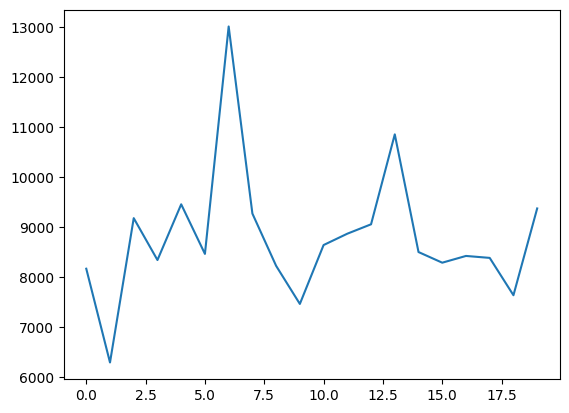

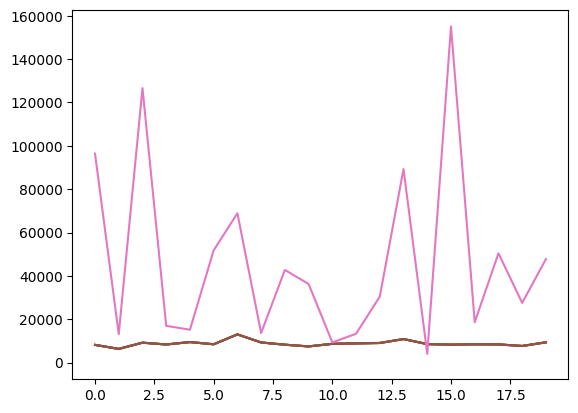

In [62]:
# Plot the first 20 predictions vs the true values
from matplotlib import pyplot as plt
plt.plot(y_pred[:20])
plt.show()
plt.plot(X_test[:20])
plt.show()


# Out-of-Sample Performance

Evaluate the model using "out-of-sample" data (X_test and y_test)

In [70]:
from sklearn.metrics import mean_squared_error
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
mse = mean_squared_error(Y_test,y_pred)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
rmse = np.sqrt(mse)


# In-Sample Performance

Evaluate the model using in-sample data (X_train and y_train)

In [80]:
# Construct a dataframe using just the "y" training data:
# YOUR CODE HERE!
df = pd.DataFrame(Y_train, columns = ['y training data'])

# Add a column of "in-sample" predictions to that dataframe:  
df['in-sample'] = Y_train

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
mse = mean_squared_error(df['y training data'],df['in-sample'])

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
rmse = np.sqrt(mse)



# Conclusions

The out-of-sample RMSE is lower than the in-sample RMSE. RMSE is typically lower for training data, but is higher in this case. This means the model made better predictions on data it has never seen before (the test set) than the actual training set.  Therefore, I would *not* trust these predictions, and would instead develop a new mode.